In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# import glob

# folder_path = 'data'  
# file_type = 'xlsx'  
# files = glob.glob(f"{folder_path}/*.{file_type}")


# all_data = []
# for file in files:
#     df = pd.read_excel(file)
#     all_data.append(df)

# combined_df = pd.concat(all_data, ignore_index=True)



# combined_df.to_csv('combined_data.csv', index=False)  

In [2]:
df = pd.read_csv('combined_data.csv')
data = df.copy()

In [3]:
df.head()

,OrderId,External OrderId,Store,SellerOrderSource,Customer,Name,Brand,Sku,UnitPriceExclTax,UnitPriceInclTax,...,ShippingCompany,ShippingCountry,ShippingStateProvince,ShippingCounty,ShippingCity,ShippingAddress1,ShippingAddress2,ShippingZipPostalCode,ShippingPhoneNumber,ShippingFaxNumber
0,VC1148-72691,5.406431e+12,PF Shopify,web,sofiya.androshchuk@gmail.com,Block Heel Kit 3 Black Wood,Pashion Footwear,911HO21HKB3BW,40.00,41.000000,...,NaN,US,NY,NaN,Brooklyn,1531 72nd St,Apt 1R,11228-2122,347-885-5781,347-885-5781
1,VC1148-72691,5.406431e+12,PF Shopify,web,sofiya.androshchuk@gmail.com,Block Heel Kit 3 Forest Green,Pashion Footwear,911HO21HKB3FG,40.00,41.000000,...,NaN,US,NY,NaN,Brooklyn,1531 72nd St,Apt 1R,11228-2122,347-885-5781,347-885-5781
2,VC1148-72679,5.406313e+12,PF Shopify,web,brandeelee29@gmail.com,Block Heel Kit 1.5 Chrome Gold,Pashion Footwear,911SP22HKB15CHG,28.63,29.717684,...,NaN,US,WA,NaN,Stanwood,8817 Lakewood Road,NaN,98292,+13609105952,+13609105952
3,VC1148-72679,5.406313e+12,PF Shopify,web,brandeelee29@gmail.com,Stelo - Chrome Silver,Pashion Footwear,995SU23STSV,22.72,23.807684,...,NaN,US,WA,NaN,Stanwood,8817 Lakewood Road,NaN,98292,+13609105952,+13609105952
4,VC1148-72679,5.406313e+12,PF Shopify,web,brandeelee29@gmail.com,Stelo - Chrome Rose Gold,Pashion Footwear,995HO23STRG,22.72,23.807684,...,NaN,US,WA,NaN,Stanwood,8817 Lakewood Road,NaN,98292,+13609105952,+13609105952


In [4]:
df.shape

(36047, 47)

In [5]:
df.columns

Index(['OrderId', 'External OrderId', 'Store', 'SellerOrderSource', 'Customer',
       'Name', 'Brand', 'Sku', 'UnitPriceExclTax', 'UnitPriceInclTax',
       'Quantity', 'PriceExclTax', 'PriceInclTax', 'OrderShippingInclTax',
       'OrderStatus', 'PaymentStatus', 'ShippingStatus', 'PaymentMethod',
       'ShippingMethod', 'CreatedOnUtc', 'RecievedOn', 'BillingFirstName',
       'BillingLastName', 'BillingEmail', 'BillingCompany', 'BillingCountry',
       'BillingStateProvince', 'BillingCounty', 'BillingCity',
       'BillingAddress1', 'BillingAddress2', 'BillingZipPostalCode',
       'BillingPhoneNumber', 'BillingFaxNumber', 'ShippingFirstName',
       'ShippingLastName', 'ShippingEmail', 'ShippingCompany',
       'ShippingCountry', 'ShippingStateProvince', 'ShippingCounty',
       'ShippingCity', 'ShippingAddress1', 'ShippingAddress2',
       'ShippingZipPostalCode', 'ShippingPhoneNumber', 'ShippingFaxNumber'],
      dtype='object')

In [6]:
step_size = 10


for start in range(0, df.shape[1], step_size):
    end = start + step_size

    print(f"Columns {start} to {min(end, df.shape[1])}:")
    display(df.iloc[:, start:end].head(3))
#     print(df.iloc[:, start:end].head(3))

Columns 0 to 10:


,OrderId,External OrderId,Store,SellerOrderSource,Customer,Name,Brand,Sku,UnitPriceExclTax,UnitPriceInclTax
0,VC1148-72691,5.406431e+12,PF Shopify,web,sofiya.androshchuk@gmail.com,Block Heel Kit 3 Black Wood,Pashion Footwear,911HO21HKB3BW,40.00,41.000000
1,VC1148-72691,5.406431e+12,PF Shopify,web,sofiya.androshchuk@gmail.com,Block Heel Kit 3 Forest Green,Pashion Footwear,911HO21HKB3FG,40.00,41.000000
2,VC1148-72679,5.406313e+12,PF Shopify,web,brandeelee29@gmail.com,Block Heel Kit 1.5 Chrome Gold,Pashion Footwear,911SP22HKB15CHG,28.63,29.717684


Columns 10 to 20:


,Quantity,PriceExclTax,PriceInclTax,OrderShippingInclTax,OrderStatus,PaymentStatus,ShippingStatus,PaymentMethod,ShippingMethod,CreatedOnUtc
0,1,40.00,40.000000,4.5,Complete,Paid,Delivered,Prepaid (External),NaN,12/3/2023 1:51:02 AM
1,1,40.00,40.000000,4.5,Complete,Paid,Delivered,Prepaid (External),NaN,12/3/2023 1:51:02 AM
2,1,28.63,31.140395,0.0,Complete,Paid,Delivered,Prepaid (External),NaN,12/3/2023 12:38:19 AM


Columns 20 to 30:


,RecievedOn,BillingFirstName,BillingLastName,BillingEmail,BillingCompany,BillingCountry,BillingStateProvince,BillingCounty,BillingCity,BillingAddress1
0,12/6/2023 1:19:02 AM,Sofiya,Androshchuk,sofiya.androshchuk@gmail.com,NaN,US,NY,NaN,Brooklyn,1531 72nd St
1,12/6/2023 1:19:02 AM,Sofiya,Androshchuk,sofiya.androshchuk@gmail.com,NaN,US,NY,NaN,Brooklyn,1531 72nd St
2,12/6/2023 1:19:02 AM,Brandee,Griffin,brandeelee29@gmail.com,NaN,US,WA,NaN,Stanwood,8817 Lakewood Road


Columns 30 to 40:


,BillingAddress2,BillingZipPostalCode,BillingPhoneNumber,BillingFaxNumber,ShippingFirstName,ShippingLastName,ShippingEmail,ShippingCompany,ShippingCountry,ShippingStateProvince
0,Apt 1R,11228-2122,347-885-5781,347-885-5781,Sofiya,Androshchuk,sofiya.androshchuk@gmail.com,NaN,US,NY
1,Apt 1R,11228-2122,347-885-5781,347-885-5781,Sofiya,Androshchuk,sofiya.androshchuk@gmail.com,NaN,US,NY
2,NaN,98292,+13609105952,+13609105952,Brandee,Griffin,brandeelee29@gmail.com,NaN,US,WA


Columns 40 to 47:


,ShippingCounty,ShippingCity,ShippingAddress1,ShippingAddress2,ShippingZipPostalCode,ShippingPhoneNumber,ShippingFaxNumber
0,NaN,Brooklyn,1531 72nd St,Apt 1R,11228-2122,347-885-5781,347-885-5781
1,NaN,Brooklyn,1531 72nd St,Apt 1R,11228-2122,347-885-5781,347-885-5781
2,NaN,Stanwood,8817 Lakewood Road,NaN,98292,+13609105952,+13609105952


### Models

note: model with a lower RMSE or MAE and a higher R^2 is generally considered better.

1. Mean Squared Error (MSE)
Definition: MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual values.
What It Tells You:
Error Magnitude: A high MSE indicates a large error magnitude, suggesting poor model performance. A low MSE indicates the model predictions are close to the actual data points.
Sensitive to Outliers: Because the errors are squared, MSE is very sensitive to outliers. Large errors have disproportionately large effects on MSE, making it a good metric to check for outlier influence.
2. Root Mean Squared Error (RMSE)
Definition: RMSE is the square root of the mean of the squared errors. It converts the units back to the original units of the output variable, making it more interpretable than MSE.
What It Tells You:
Error Standard: RMSE provides a standard for the deviations of prediction errors. Lower values of RMSE indicate better fit.
Scale Interpretability: Because RMSE is in the same units as the response variable, it's easier to understand in the context of the data.
3. Mean Absolute Error (MAE)
Definition: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction (i.e., without squaring).
What It Tells You:
Average Error: Gives a linear score of the average prediction error. One unit of MAE corresponds directly to one unit of error on the same scale as the data.
Robustness to Outliers: Unlike MSE, MAE is not as sensitive to outliers since it does not square the error values. It provides a more robust error measure in the presence of outliers.
4. R-squared (R^2)
Definition: R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination.
What It Tells You:
Explanatory Power: It indicates the percentage of the response variable variation that is explained by a linear model. An R^2 of 1 indicates that the regression predictions perfectly fit the data.
Comparative Metric: While R^2 alone cannot tell if the predictions are unbiased, high R^2 values generally indicate better model performance. However, it can be misleading as it will always increase as more predictors are added to the model, regardless of their validity.

#### MLs (Not tuned)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

data = data.dropna(subset=['Sku', 'Quantity'])

# Data Aggregation: Sum up quantities for each SKU by a specific time unit, for example, daily
data['CreatedOnUtc'] = pd.to_datetime(data['CreatedOnUtc'])
data.set_index('CreatedOnUtc', inplace=True)
aggregated_data = data.groupby(['Sku', pd.Grouper(freq='D')])['Quantity'].sum().reset_index()

# Feature Engineering: Add day of week, month as features
aggregated_data['DayOfWeek'] = aggregated_data['CreatedOnUtc'].dt.dayofweek
aggregated_data['Month'] = aggregated_data['CreatedOnUtc'].dt.month

# Prepare the data for the model
features = ['DayOfWeek', 'Month']
X = aggregated_data[features]
y = aggregated_data['Quantity']

# Time-based splitting
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# List of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Elastic Net', ElasticNet()),
    ('SVR', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
#     ('LightGBM', lgb.LGBMRegressor()),
    ('CatBoost', CatBoostRegressor(verbose=0))
]

# Initialize DataFrame to store results
results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Append results using concat
    result_df = pd.DataFrame([[name, mse, rmse, mae, r2]], columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])
    results = pd.concat([results, result_df], ignore_index=True)

In [8]:
print(aggregated_data)

                  Sku CreatedOnUtc  Quantity  DayOfWeek  Month
0      10105HO21STCHG   2023-10-08         1          6     10
1      10105HO21STCHG   2023-12-02         1          5     12
2      10105HO21STCHG   2023-12-04         2          0     12
3      10105HO21STCHG   2023-12-06         1          2     12
4      10105HO21STCHG   2023-12-07         1          3     12
...               ...          ...       ...        ...    ...
25321    SP-SR-400450   2023-11-12         1          6     11
25322    SP-SR-500550   2023-11-06         1          0     11
25323     SP-SR-75100   2023-10-07         1          5     10
25324     SP-SR-75100   2023-10-12         1          3     10
25325     SP-SR-75100   2023-11-21         1          1     11

[25326 rows x 5 columns]


In [9]:
value_counts = aggregated_data['Sku'].value_counts()
value_counts

Sku
785HO21FCCO         125
785HO21HKS4GD       115
785HO21FCTA         108
785HO21HKB3CO       101
785HO21HKB4GD        95
                   ... 
5SP22MIWALS3WAL       1
5SP22MIWL             1
75SP24PAIVSB          1
85SP24PAIVSBS3IV      1
5HO23KHCK             1
Name: count, Length: 4348, dtype: int64

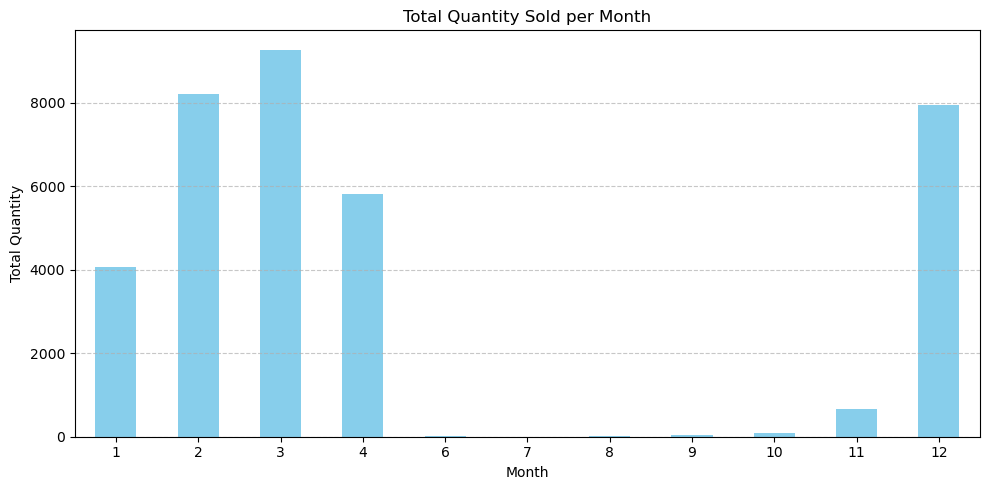

In [10]:
# Group by 'Month' and sum 'Quantity'
monthly_quantity = aggregated_data.groupby('Month')['Quantity'].sum()

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 5))
monthly_quantity.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)  # Keep the month labels horizontal for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


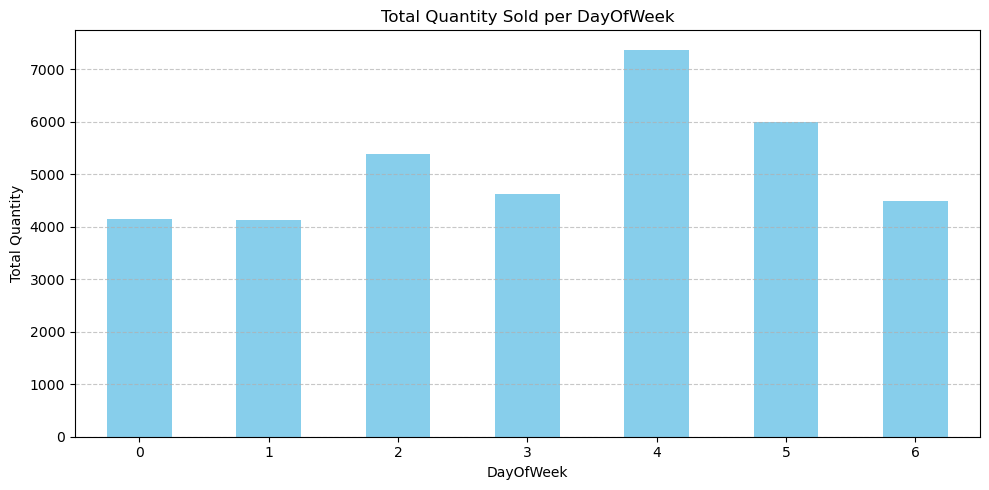

In [11]:
# Group by 'Month' and sum 'Quantity'
monthly_quantity = aggregated_data.groupby('DayOfWeek')['Quantity'].sum()

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 5))
monthly_quantity.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)  # Keep the month labels horizontal for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
print(results)

               Model       MSE      RMSE       MAE        R2
0  Linear Regression  3.949021  1.987214  0.841060 -0.034546
1              Ridge  3.949021  1.987214  0.841060 -0.034546
2              Lasso  3.927538  1.981802  0.847461 -0.028918
3        Elastic Net  3.927538  1.981802  0.847461 -0.028918
4                SVR  4.168863  2.041779  0.735847 -0.092139
5      Decision Tree  3.813103  1.952717  0.807427  0.001061
6      Random Forest  3.814619  1.953105  0.806858  0.000664
7  Gradient Boosting  3.827658  1.956440  0.812138 -0.002752
8            XGBoost  3.813049  1.952703  0.807307  0.001075
9           CatBoost  3.813098  1.952716  0.807574  0.001062


#### Models Tuned

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor


models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'CatBoost': CatBoostRegressor(verbose=0)
}

param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Elastic Net': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]},
    'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [3, 5, 7]}
}

results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

# Conducting Grid Search or direct fitting, depending on the model
for name, model in models.items():
    print(f"Processing {name}...")
    if name in param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Append results using concat
    result_df = pd.DataFrame([[name, mse, rmse, mae, r2]], columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])
    results = pd.concat([results, result_df], ignore_index=True)

# Print the results table
print(results) 


Processing Linear Regression...
Processing Ridge...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Processing Lasso...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Processing Elastic Net...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Processing SVR...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Processing Decision Tree...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Processing Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Processing Gradient Boosting...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Processing XGBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Processing CatBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
               Model       MSE      RMSE       MAE        R2
0  Linear Regression  3.949021  1.987214  0.841060 -0.034546
1              Ridge  3.949021  1.987214  0.841060 -0.034546
2              Lasso  3.

In [14]:
results

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,3.949021,1.987214,0.841060,-0.034546
1,Ridge,3.949021,1.987214,0.841060,-0.034546
2,Lasso,3.948882,1.987179,0.841101,-0.034510
3,Elastic Net,3.948992,1.987207,0.841069,-0.034539
4,SVR,4.168863,2.041779,0.735847,-0.092139
5,Decision Tree,3.813103,1.952717,0.807427,0.001061
6,Random Forest,3.811806,1.952385,0.807248,0.001401
7,Gradient Boosting,3.822609,1.955149,0.811876,-0.001429
8,XGBoost,3.822632,1.955155,0.811896,-0.001435
9,CatBoost,3.824581,1.955654,0.810866,-0.001946


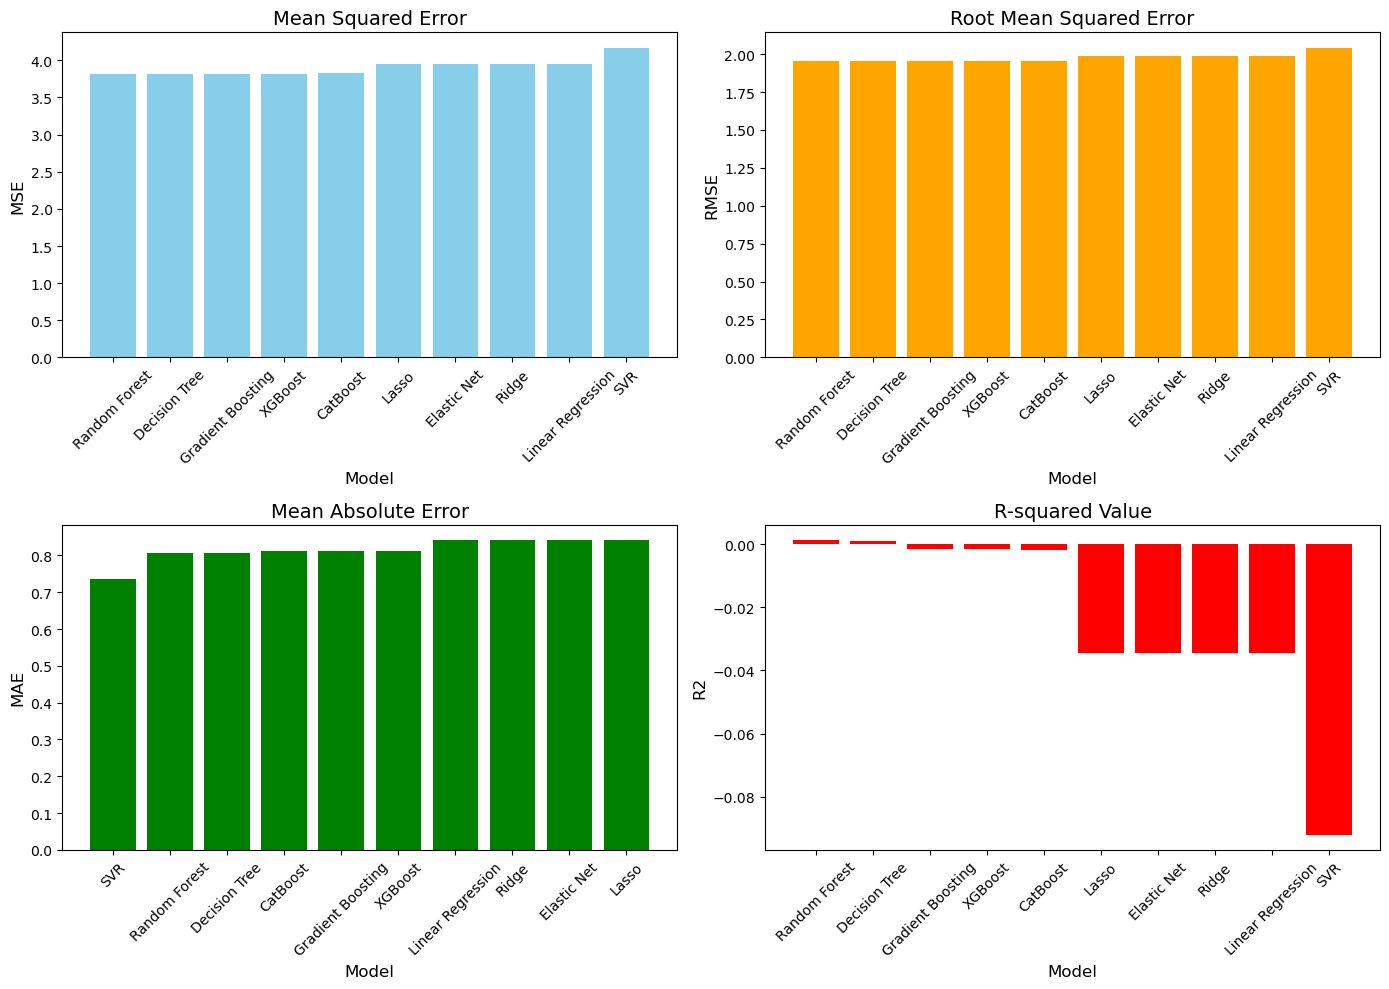

In [15]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(14, 10)) 


metrics = ['MSE', 'RMSE', 'MAE', 'R2']
colors = ['skyblue', 'orange', 'green', 'red']
titles = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Value']

for ax, metric, color, title in zip(axs.flatten(), metrics, colors, titles):
    sorted_results = results.sort_values(by=metric, ascending=(metric != 'R2'))  # R2 should be sorted descending
    ax.bar(sorted_results['Model'], sorted_results[metric], color=color)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.tick_params('x', labelrotation=45)  

plt.tight_layout()
plt.show()



#### Traditional Models

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm  # For OLS regression

# Assuming time_series_train and time_series_test are defined as y_train and y_test from your dataset
time_series_train = y_train
time_series_test = y_test

# Initialize the results DataFrame
results_trad = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

# Example using Exponential Smoothing
model = ExponentialSmoothing(time_series_train, trend="add", seasonal="add", seasonal_periods=12).fit()
predictions = model.forecast(steps=len(time_series_test))

# Calculate metrics and add to results DataFrame
new_row = pd.DataFrame({
    'Model': 'Exponential Smoothing', 
    'MSE': mean_squared_error(time_series_test, predictions),
    'RMSE': np.sqrt(mean_squared_error(time_series_test, predictions)),
    'MAE': mean_absolute_error(time_series_test, predictions),
    'R2': r2_score(time_series_test, predictions)
}, index=[0])
results_trad = pd.concat([results_trad, new_row], ignore_index=True)



# Second Degree Polynomial Regression
X_poly = np.column_stack([X**2, X])
model_poly = sm.OLS(y, sm.add_constant(X_poly)).fit()
X_test_poly = np.column_stack([X_test**2, X_test])
predictions_poly = model_poly.predict(sm.add_constant(X_test_poly))


# Calculate metrics and add to results DataFrame
new_row = pd.DataFrame({
    'Model': '2nd Degree Poly Regression', 
    'MSE': mean_squared_error(time_series_test, predictions_poly),
    'RMSE': np.sqrt(mean_squared_error(time_series_test, predictions_poly)),
    'MAE': mean_absolute_error(time_series_test, predictions_poly),
    'R2': r2_score(time_series_test, predictions_poly)
}, index=[0])
results_trad = pd.concat([results_trad, new_row], ignore_index=True)


# Moving Average
window = 12  # Define window size for the moving average
moving_avg = time_series_train.rolling(window=window).mean().iloc[-1]
predictions_ma = np.full(len(time_series_test), moving_avg)  # Predict same value for all future points

# Calculate metrics and add to results DataFrame
new_row_ma = pd.DataFrame({
    'Model': 'Moving Average',
    'MSE': mean_squared_error(time_series_test, predictions_ma),
    'RMSE': np.sqrt(mean_squared_error(time_series_test, predictions_ma)),
    'MAE': mean_absolute_error(time_series_test, predictions_ma),
    'R2': r2_score(time_series_test, predictions_ma)
}, index=[0])
results_trad = pd.concat([results_trad, new_row_ma], ignore_index=True)


# Weighted Moving Average
weights = np.linspace(1, 0, window)  # Linearly decreasing weights
weighted_avg = np.average(time_series_train[-window:], weights=weights)
predictions_wma = np.full(len(time_series_test), weighted_avg)

# Calculate metrics and add to results DataFrame
new_row_wma = pd.DataFrame({
    'Model': 'Weighted Moving Avg',
    'MSE': mean_squared_error(time_series_test, predictions_wma),
    'RMSE': np.sqrt(mean_squared_error(time_series_test, predictions_wma)),
    'MAE': mean_absolute_error(time_series_test, predictions_wma),
    'R2': r2_score(time_series_test, predictions_wma)
}, index=[0])
results_trad = pd.concat([results_trad, new_row_wma], ignore_index=True)


# Linear Smoothing using Simple Exponential Smoothing (as an example)
model_exp = ExponentialSmoothing(time_series_train, trend=None, seasonal=None, seasonal_periods=12).fit()
predictions_exp = model_exp.forecast(steps=len(time_series_test))

# Calculate metrics and add to results DataFrame
new_row_exp = pd.DataFrame({
    'Model': 'Linear Smoothing',
    'MSE': mean_squared_error(time_series_test, predictions_exp),
    'RMSE': np.sqrt(mean_squared_error(time_series_test, predictions_exp)),
    'MAE': mean_absolute_error(time_series_test, predictions_exp),
    'R2': r2_score(time_series_test, predictions_exp)
}, index=[0])
results_trad = pd.concat([results_trad, new_row_exp], ignore_index=True)


In [17]:
# Print the results
results_trad

,Model,MSE,RMSE,MAE,R2
0,Exponential Smoothing,3.831201,1.957346,0.931541,-0.003680
1,2nd Degree Poly Regression,3.866930,1.966451,0.869933,-0.013041
2,Moving Average,3.829191,1.956832,0.942690,-0.003154
3,Weighted Moving Avg,3.826145,1.956053,1.030225,-0.002356
4,Linear Smoothing,3.847466,1.961496,0.915134,-0.007941


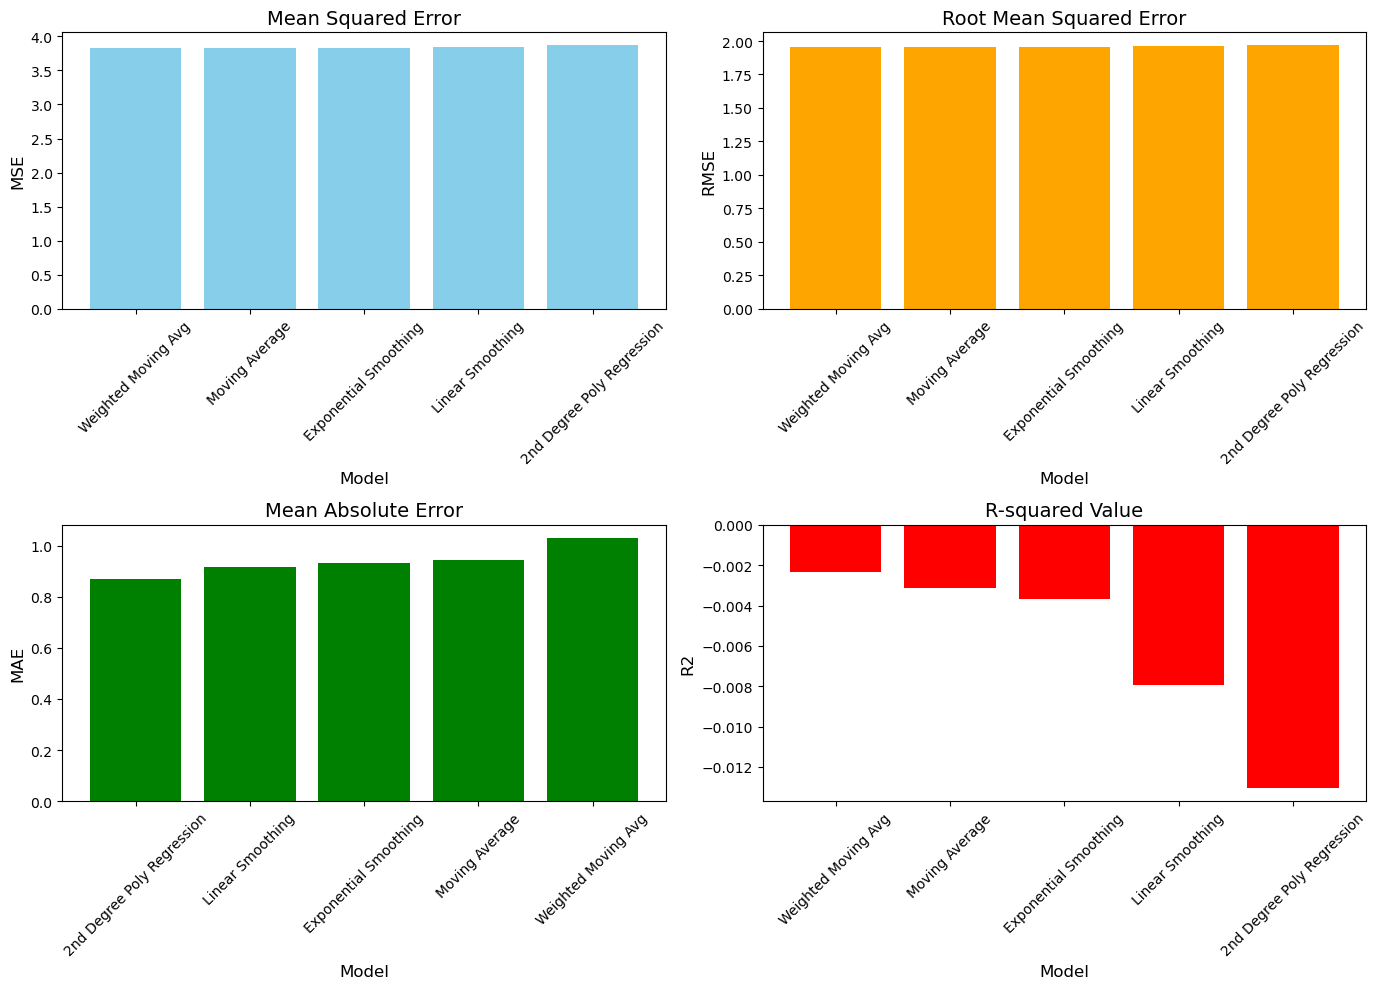

In [18]:
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
colors = ['skyblue', 'orange', 'green', 'red']  # Colors for the bars
titles = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Value']

# Setup figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten the array to make iteration easier

for ax, metric, color, title in zip(axs, metrics, colors, titles):
    sorted_results = results_trad.sort_values(by=metric, ascending=(metric != 'R2'))  # R2 should be sorted descending
    ax.bar(sorted_results['Model'], sorted_results[metric], color=color)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.tick_params('x', labelrotation=45)  # Rotate model names to avoid overlap

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [19]:
# Concatenate the two DataFrames
combined_results = pd.concat([results, results_trad], ignore_index=True)

# Print the combined DataFrame
print(combined_results)

                         Model       MSE      RMSE       MAE        R2
0            Linear Regression  3.949021  1.987214  0.841060 -0.034546
1                        Ridge  3.949021  1.987214  0.841060 -0.034546
2                        Lasso  3.948882  1.987179  0.841101 -0.034510
3                  Elastic Net  3.948992  1.987207  0.841069 -0.034539
4                          SVR  4.168863  2.041779  0.735847 -0.092139
5                Decision Tree  3.813103  1.952717  0.807427  0.001061
6                Random Forest  3.811806  1.952385  0.807248  0.001401
7            Gradient Boosting  3.822609  1.955149  0.811876 -0.001429
8                      XGBoost  3.822632  1.955155  0.811896 -0.001435
9                     CatBoost  3.824581  1.955654  0.810866 -0.001946
10       Exponential Smoothing  3.831201  1.957346  0.931541 -0.003680
11  2nd Degree Poly Regression  3.866930  1.966451  0.869933 -0.013041
12              Moving Average  3.829191  1.956832  0.942690 -0.003154
13    

**Decision Tree further tuning**

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score






param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator found by GridSearch
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Perform cross-validation with the best estimator
cross_val_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE scores:", cross_val_scores)
print("Mean cross-validation MSE:", cross_val_scores.mean())
print("Standard deviation of CV MSE:", cross_val_scores.std())

# Fit model on the entire training data using the best estimator and check performance on the test set
best_dt.fit(X_train, y_train)
test_predictions = best_dt.predict(X_test)

# Calculate metrics for the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the test set performance
print("Test Set Performance:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R2:", test_r2)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Cross-validation MSE scores: [-0.56538415 -0.41924176 -2.26556953 -4.3990129  -1.09410042]
Mean cross-validation MSE: -1.7486617504366024
Standard deviation of CV MSE: 1.475636050713584
Test Set Performance:
MSE: 3.8131075498704403
RMSE: 1.9527179903586795
MAE: 0.8074526054158846
R2: 0.0010597215625155476


/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

In [20]:
# Define the model
dt = DecisionTreeRegressor(random_state=42)

# Set up hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_


# Make predictions
predictions = best_dt.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print("Best Decision Tree Model Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

Best Decision Tree Model Performance:
MSE: 3.8131075498704403
RMSE: 1.9527179903586795
MAE: 0.8074526054158846
R2: 0.0010597215625155476


/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

In [21]:
# Print the metrics
print("Best Decision Tree Model Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

Best Decision Tree Model Performance:
MSE: 3.8131075498704403
RMSE: 1.9527179903586795
MAE: 0.8074526054158846
R2: 0.0010597215625155476


In [23]:
import pandas as pd
from datetime import datetime, timedelta

# Assume today's date for this example, and generate the next 7 days
today = datetime.today()
next_week_dates = [today + timedelta(days=i) for i in range(7)]
next_week_data = pd.DataFrame({
    'CreatedOnUtc': next_week_dates,
    'DayOfWeek': [date.weekday() for date in next_week_dates],
    'Month': [date.month for date in next_week_dates]
})

# Prepare the data (assuming the model uses DayOfWeek and Month as inputs)
X_next_week = next_week_data[['DayOfWeek', 'Month']]

# Predict using the trained decision tree model
next_week_predictions = dt.predict(X_next_week)
print("Predictions for the next week:")
print(next_week_predictions)


NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Generate dates for next year
next_year_dates = [datetime(today.year + 1, month, 1) + timedelta(days=i) 
                   for month in range(1, 13) 
                   for i in range(30)]  # Simplified to 30 days per month for example

next_year_data = pd.DataFrame({
    'CreatedOnUtc': next_year_dates,
    'DayOfWeek': [date.weekday() for date in next_year_dates],
    'Month': [date.month for date in next_year_dates]
})

# Prepare the data for the model
X_next_year = next_year_data[['DayOfWeek', 'Month']]

# Predict using the trained decision tree model
next_year_predictions = dt_model.predict(X_next_year)
print("Predictions for the next year on selected days:")
print(next_year_predictions)


In [ ]:
dwqefrgthjyu

#### Neural Net (fully connected feedforward neural network)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print("Neural Network Model Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

In [ ]:
# Make predictions
predictions = model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print("Neural Network Model Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


In [ ]:
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow import keras

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    for i in range(hp.Int('n_layers', 1, 3)):  # Adding 1-3 hidden layers
        model.add(Dense(hp.Int(f'dense_{i}_units', min_value=32, max_value=256, step=32),
                        activation='relu'))

    model.add(Dense(1))  # Output layer for regression
    
    model.compile(optimizer=keras.optimizers.Adam(
                  hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse')
    
    return model


In [ ]:
# tuner = Hyperband(
#     build_model,
#     objective='val_loss',  # Minimize validation loss
#     max_epochs=50,
#     factor=3,
#     directory='my_dir',
#     project_name='intro_to_kt'
# )


# tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
# best_model = tuner.get_best_models(num_models=1)[0]

# # Make predictions
# predictions = best_model.predict(X_test).flatten()

# # Calculate metrics
# mse = mean_squared_error(y_test, predictions)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, predictions)
# r2 = r2_score(y_test, predictions)

# # Print the metrics
# print("Tuned Neural Network Model Performance:")
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("MAE:", mae)
# print("R2:", r2)
